# Laboratorio 2: Controlabilidad, observabilidad, estabilidad y detectabilidad

**Nombres:** Sebastián Acuña U. y Nicolás A. Herrera <br>
**Fecha:** 10 de septiembre de 2024 <br>
**Profesor:** Héctor Ramírez C. <br>
**Auxiliar:** Diego Olguín W. <br>
**Ayudantes:** Carlos Antil C. y Luis Fuentes C. <br>
**Curso:** [MA4703-1] Control Óptimo: Teoría y Laboratorio

In [75]:
# Librerías a utilizar

#using Pkg
#Pkg.add("DifferentialEquations")
#Pkg.add("JuMP")
#Pkg.add("NonlinearSolve")
#Pkg.add("OptimalControl")
#Pkg.add("LaTeXStrings")
#Pkg.add("NLPModelsIpopt")
#Pkg.add("ControlSystems")

using LinearAlgebra
using Plots
using LaTeXStrings
using DifferentialEquations
using NonlinearSolve
using OptimalControl
using ControlSystems

## Parte A: Modelamiento y Simulación

**FALTA: agregar un control con feedback y corregir los títulos de los gráficos**

**Ejercicio 1:** Utilizando `DifferentialEquations` simule trayectorias del sistema lineal para distintos controles (constantes, sinusoidales, feedbacks, bang bang, etc.) con $\Omega_0 = 6.4 \cdot 10^{−3}$ y $R_0^3 = \frac{\mu}{\Omega_0^2}$.

In [76]:
# Constantes
m = 350 # masa del satélite
mu = 4.54 * 10^13 # constante gravitacional

T = 10.0 # tiempo final de simulación
tspan = (0.0, T) # intervalo de tiempo
TT = LinRange(0.0, T, 10000) # vector de tiempo

# Constantes orbitales
Omega = 6.4 * 10^(-5) # Omega_0
R = (mu/Omega^2)^(1/3) # R_0

# Matrices del sistema
A = [0 1 0 0; 
    3*Omega^2 0 0 2*Omega*R; 
    0 0 0 1; 
    0 -2*Omega/R 0 0]
    
B = [0 0; 
    1/m 0; 
    0 0; 
    0 1/(m*R)]

# Función auxiliar para control tipo bang-bang
function char(t)
    if t <= T/2
        return 1
    else
        return -1
    end
end

# Funciones para los sistemas a resolver
function constant1!(dx, x, u, t)
    dx .= A * x
end

function constant2!(dx, x, u, t)
    dx .= A * x .+ B * [1 ; 1]
end

function constant3!(dx, x, u, t)
    dx .= A * x .+ B * [1 ; -1]
end

function sinusoidal1!(dx, x, u, t)
    dx .= A * x .+ B * [sin(t) ; sin(t)]
end

function sinusoidal2!(dx, x, u, t)
    dx .= A * x .+ B * [sin(t) ; 1]
end

function bangbang1!(dx, x, u, t)
    dx .= A * x .+ B * [char(t) ; char(t)]
end

# Solución de los sistemas
prob1 = ODEProblem(constant1!, [0, 0, 0, 0], tspan)
prob2 = ODEProblem(constant2!, [0, 0, 0, 0], tspan)
prob3 = ODEProblem(constant3!, [0, 0, 0, 0], tspan)
prob4 = ODEProblem(sinusoidal1!, [0, 0, 0, 0], tspan)
prob5 = ODEProblem(sinusoidal2!, [0, 0, 0, 0], tspan)
prob6 = ODEProblem(bangbang1!, [0, 0, 0, 0], tspan)

sol1 = solve(prob1, Tsit5(), saveat = TT)
sol2 = solve(prob2, Tsit5(), saveat = TT)
sol3 = solve(prob3, Tsit5(), saveat = TT)
sol4 = solve(prob4, Tsit5(), saveat = TT)
sol5 = solve(prob5, Tsit5(), saveat = TT)
sol6 = solve(prob6, Tsit5(), saveat = TT)


retcode: Success
Interpolation: 1st order linear
t: 10000-element Vector{Float64}:
  0.0
  0.001000100010001
  0.002000200020002
  0.0030003000300030005
  0.004000400040004
  0.005000500050005001
  0.006000600060006001
  0.0070007000700070005
  0.008000800080008
  0.009000900090009001
  0.010001000100010001
  0.011001100110011
  0.012001200120012002
  ⋮
  9.988998899889989
  9.98999899989999
  9.99099909990999
  9.991999199919992
  9.992999299929993
  9.993999399939995
  9.994999499949994
  9.995999599959996
  9.996999699969997
  9.997999799979999
  9.998999899989998
 10.0
u: 10000-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0]
 [1.4288572466906536e-9, 2.857428782896569e-6, 6.408506606983564e-17, 1.281573123921621e-13]
 [5.715429230645356e-9, 5.7148579315805785e-6, 2.5634025334107e-16, 2.56314608378545e-13]
 [1.2859716317688139e-8, 8.572287446052006e-6, 5.767655454062846e-16, 3.8447188795914623e-13]
 [2.286171887364281e-8, 1.1429717326310823e-5, 1.0253609258580422e-15, 5.126291

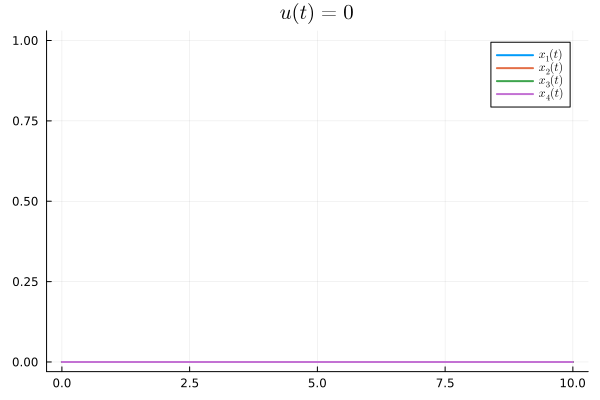

In [77]:
plot(TT, sol1[1, :], label=L"x_1(t)", linewidth=2)
plot!(TT, sol1[2, :], label=L"x_2(t)", linewidth=2)
plot!(TT, sol1[3, :], label=L"x_3(t)", linewidth=2)
plot!(TT, sol1[4, :], label=L"x_4(t)", linewidth=2)
title!(L"u(t) = 0")

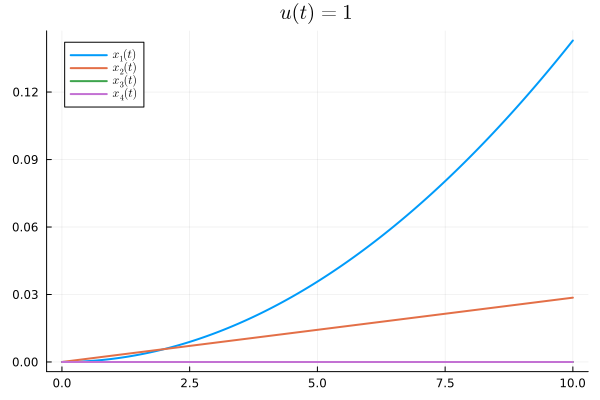

In [78]:
plot(TT, sol2[1, :], label=L"x_1(t)", linewidth=2)
plot!(TT, sol2[2, :], label=L"x_2(t)", linewidth=2)
plot!(TT, sol2[3, :], label=L"x_3(t)", linewidth=2)
plot!(TT, sol2[4, :], label=L"x_4(t)", linewidth=2)
title!(L"u(t) = 1")

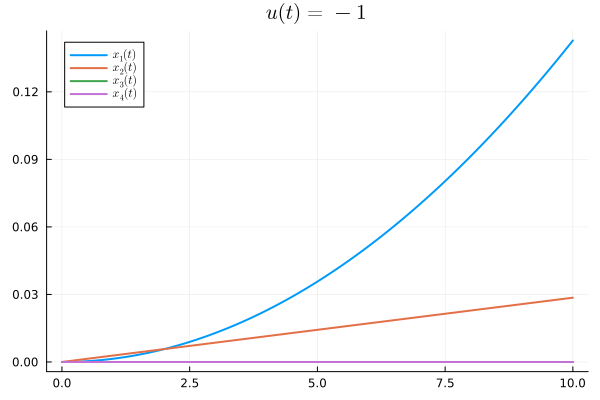

In [79]:
plot(TT, sol3[1, :], label=L"x_1(t)", linewidth=2)
plot!(TT, sol3[2, :], label=L"x_2(t)", linewidth=2)
plot!(TT, sol3[3, :], label=L"x_3(t)", linewidth=2)
plot!(TT, sol3[4, :], label=L"x_4(t)", linewidth=2)
title!(L"u(t) = -1")

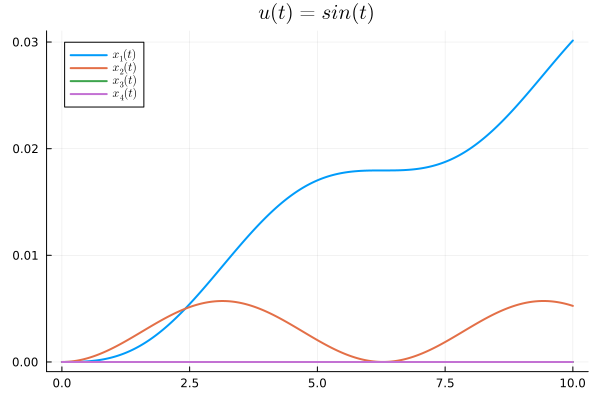

In [80]:
plot(TT, sol4[1, :], label=L"x_1(t)", linewidth=2)
plot!(TT, sol4[2, :], label=L"x_2(t)", linewidth=2)
plot!(TT, sol4[3, :], label=L"x_3(t)", linewidth=2)
plot!(TT, sol4[4, :], label=L"x_4(t)", linewidth=2)
title!(L"u(t) = sin(t)")

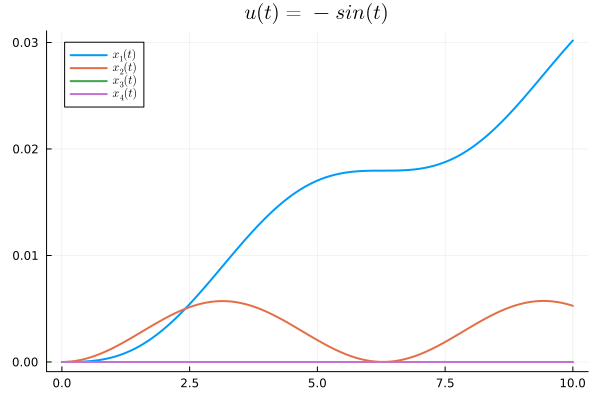

In [81]:
plot(TT, sol5[1, :], label=L"x_1(t)", linewidth=2)
plot!(TT, sol5[2, :], label=L"x_2(t)", linewidth=2)
plot!(TT, sol5[3, :], label=L"x_3(t)", linewidth=2)
plot!(TT, sol5[4, :], label=L"x_4(t)", linewidth=2)
title!(L"u(t) = -sin(t)")

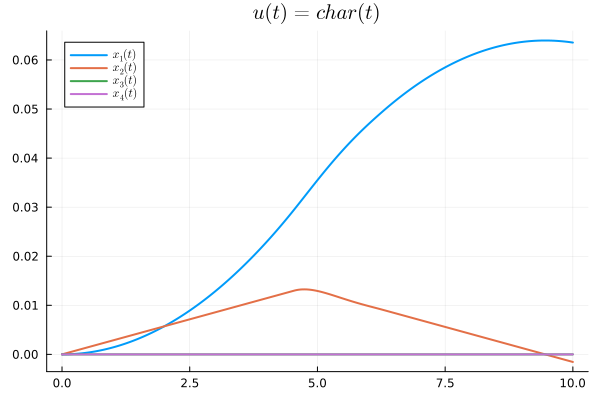

In [82]:
plot(TT, sol6[1, :], label=L"x_1(t)", linewidth=2)
plot!(TT, sol6[2, :], label=L"x_2(t)", linewidth=2)
plot!(TT, sol6[3, :], label=L"x_3(t)", linewidth=2)
plot!(TT, sol6[4, :], label=L"x_4(t)", linewidth=2)
title!(L"u(t) = char(t)")

## Parte B: Controlabilidad, observabilidad y estabilidad

**Ejercicio 2:** Utilizando `Julia` (sin el paquete de control), calcule la matriz de controlabilidad para el satélite. Compare el resultado con el obtenido usando el comando `ctrb` del paquete `ControlSystems` de `Julia`.

In [83]:
using LinearAlgebra

# Calcular las potencias de A multiplicadas por B
AB = A * B
A2B = A^2 * B
A3B = A^3 * B

# Matriz de controlabilidad
C_manual = [B AB A2B A3B]

println("Matriz de controlabilidad calculada manualmente:")
println(C_manual)


Matriz de controlabilidad calculada manualmente:
[0.0 0.0 0.002857142857142857 0.0 0.0 3.657142857142857e-7 -1.170285714285715e-11 0.0; 0.002857142857142857 0.0 0.0 3.657142857142857e-7 -1.170285714285715e-11 0.0 0.0 -1.4979657142857152e-15; 0.0 0.0 0.0 1.2814450486299205e-10 -1.6402496622462988e-14 0.0 0.0 -2.0995195676752627e-18; 0.0 1.2814450486299205e-10 -1.6402496622462988e-14 0.0 0.0 -2.0995195676752627e-18 6.718462616560845e-23 0.0]


In [84]:
using ControlSystems

# Calcular la matriz de controlabilidad
C_controlsystems = ctrb(A,B)

println("Matriz de controlabilidad usando ControlSystems:")
println(C_controlsystems)


Matriz de controlabilidad usando ControlSystems:
[0.0 0.0 0.002857142857142857 0.0 0.0 3.657142857142857e-7 -1.1702857142857152e-11 0.0; 0.002857142857142857 0.0 0.0 3.657142857142857e-7 -1.1702857142857152e-11 0.0 0.0 -1.4979657142857148e-15; 0.0 0.0 0.0 1.2814450486299205e-10 -1.6402496622462988e-14 0.0 0.0 -2.0995195676752623e-18; 0.0 1.2814450486299205e-10 -1.6402496622462988e-14 0.0 0.0 -2.0995195676752623e-18 6.718462616560846e-23 0.0]


In [85]:
isapprox(C_manual, C_controlsystems, atol=1e-8)

true

**Ejercicio 3:** Usualmente es difícil conocer completamente las variables de estado ya que sólo podemos obtener observaciones imprecisas de estas. Por esto, en lo que sigue, supondremos que solamente observamos $x_1$ y $x_3$. Esto nos lleva a considerar un observador de la forma:

$$
\vec{Y} = C\vec{X}.
$$

Identifique $C$ y utilice `Julia` (sin el paquete de control) para calcular la matriz de observabilidad del sistema $(3)-(4)$. Compare con lo obtenido usando el comando `obsv` del paquete `ControlSystems` de `Julia`.


Respuesta: Como sólo se observa $x_1$ y $x_2$ tenemos que la matriz $C$ es de la forma:
$$
C =
\left(\begin{array}{cc} 
1 & 0 & 0 & 0\\ 
0 & 0 & 1 & 0
\end{array}\right)
$$ 


In [86]:
# Definir la matriz C
C = [1 0 0 0;
     0 0 1 0]

# Calcular las potencias de A multiplicadas por C
CA = C * A
CA2 = C * A^2
CA3 = C * A^3

# Matriz de observabilidad
O_manual = [C; CA; CA2; CA3]

println("Matriz de observabilidad calculada manualmente:")
println(O_manual)


Matriz de observabilidad calculada manualmente:
[1.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 1.0; 1.2288000000000004e-8 0.0 0.0 2853.920939530693; 0.0 -5.740873817862046e-12 0.0 0.0; 0.0 -4.096000000000002e-9 0.0 0.0; -7.054385747388884e-20 0.0 0.0 -1.6384000000000006e-8]


In [87]:
# Calcular la matriz de observabilidad
O_controlsystems = obsv(A,C)

println("Matriz de observabilidad usando ControlSystems:")
println(O_controlsystems)

Matriz de observabilidad usando ControlSystems:
[1.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 1.0; 1.2288000000000004e-8 0.0 0.0 2853.920939530693; 0.0 -5.740873817862046e-12 0.0 0.0; 0.0 -4.096000000000002e-9 0.0 0.0; -7.054385747388884e-20 0.0 0.0 -1.6384000000000006e-8]


In [88]:
isapprox(O_manual, O_controlsystems, atol=1e-8)

true

**Ejercicio 4:** A partir de lo aprendido en clases, calcule la forma canónica de Brunovski de los sistemas del ejercicio anterior (sin utilizar el toolbox de Control).

Se calcula el polinomio característico de la matriz A, obteniendo $p_A (\lambda) = \lambda ^4 + \Omega_0 ^2 \lambda^2$, de donde identificamos los coeficientes $a_1 = 0$ , $a_2 = \Omega_0 ^2$ , $a_3 = 0$ y $a_4 = 0$, con ello $\tilde{A}$ viene dada por:
$$
\tilde{A} = 
\left(\begin{array}{cc} 
0 & 1 & 0 & 0\\ 
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & -\Omega_0^2 & 0\\
\end{array}\right)
$$

## Parte C: Reguladores y estabilizadores 

**Ejercicio 5:** Construya un estabilizador por feedback lineal, $\vec{U} = −K\vec{X}$ para una matriz $K$ apropiada, para el sistema (3). Para esto, utilice los comandos `place` y `lqr` para obtener distintas matrices de ganancia $K$. Con `eigvals` de `LinearAlgebra` verifique los sistemas son estabilizables. Compare los resultados obtenidos al utilizar ambos comandos. Simule las trayectorias obtenidas por estos controles.

In [89]:
polos = [-1, -1.5, -2, -2.5]

# Calcular la matriz K usando place
K_place = place(A, B, polos)

println("Matriz de ganancias K utilizando place:")
println(K_place)

eigvals_place = eigvals(A - B * K_place);

Matriz de ganancias K utilizando place:
[762.8147969336878 1085.8941672318776 185.81808946259807 998978.510601192; 4.1430479342134113e9 2.3674559621823153e9 2.7863302977552826e10 3.041445468650703e10]


In [90]:
# Definir las matrices Q y R para lqr
Q = I(4)
R = I(2)

# Calcular la matriz K utilizando lqr
K_lqr = lqr(A,B,Q,R)

println("Matriz de ganancias K utilizando lqr:")
println(K_lqr)

eigvals_lqr = eigvals(A - B * K_lqr)


Matriz de ganancias K utilizando lqr:
[1.0000043008482606 26.47634796884896 -5.498216223336137e-6 998875.3792102906; 1.158028589065571e-5 0.044800136811057635 0.804058708619154 1.01330329906005e6]


4-element Vector{ComplexF64}:
   -0.037823354241212734 - 0.03776952119268131im
   -0.037823354241212734 + 0.03776952119268131im
 -0.00012905083778515074 + 0.0im
   -7.984117490200628e-7 + 0.0im

In [91]:
println("Comparación de valores propios:")
println("Place: ", eigvals_place)
println("LQR: ", eigvals_lqr)

# Verifica si todos los valores propios tienen partes reales negativas
if all(real(eigvals_place) .< 0)
    println("El sistema cerrado con place es estable.")
else
    println("El sistema cerrado con place no es estable.")
end

if all(real(eigvals_lqr) .< 0)
    println("El sistema cerrado con lqr es estable.")
else
    println("El sistema cerrado con lqr no es estable.")
end

Comparación de valores propios:
Place: [-2.499999999999859, -2.0000000000001155, -1.500000000000085, -0.9999999999999434]
LQR: ComplexF64[-0.037823354241212734 - 0.03776952119268131im, -0.037823354241212734 + 0.03776952119268131im, -0.00012905083778515074 + 0.0im, -7.984117490200628e-7 + 0.0im]
El sistema cerrado con place es estable.
El sistema cerrado con lqr es estable.


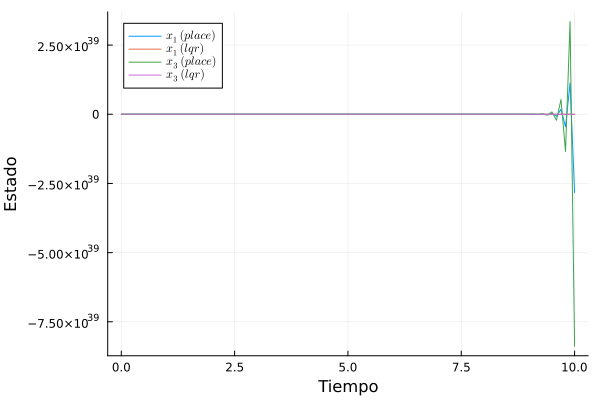

In [93]:
# Condiciones iniciales
X0 = [0.0, 0.0, 1.0, 0.0]  # Inicialmente lejos del equilibrio

# dinámica del sistema cerrado con place
function closed_loop_place!(du, u, p, t)
    du .= (A - B * K_place) * u
end

# dinámica del sistema cerrado con lqr
function closed_loop_lqr!(du, u, p, t)
    du .= (A - B * K_lqr) * u
end

# trayectoria utilizando place
t = 0:0.1:10
X_place = zeros(length(t), 4)
u = copy(X0)
for i in 1:length(t)
    X_place[i, :] = u
    closed_loop_place!(u, u, nothing, t[i])
end

#trayectoria utilizando lqr
X_lqr = zeros(length(t), 4)
u = copy(X0)
for i in 1:length(t)
    X_lqr[i, :] = u
    closed_loop_lqr!(u, u, nothing, t[i])
end

plot(t, X_place[:, 1], label=L"x_1 \ (place)", xlabel="Tiempo", ylabel="Estado")
plot!(t, X_lqr[:, 1], label=L"x_1 \ (lqr)")
plot!(t, X_place[:, 3], label=L"x_3 \ (place)")
plot!(t, X_lqr[:, 3], label=L"x_3 \ (lqr)")


**Ejercicio 6:** Construya el estimador de Luenberger asociado al sistema controlado y observado del ejercicio 3. Simule el estimador para distintos observaciones $Y(\cdot)$ y controles $U(\cdot)$.

In [94]:
# Definir la matriz L para el estimador de Luenberger
poles_estimator = [-3, -3.5, -4, -4.5]
L = place(A', C', poles_estimator)'

println("Matriz de ganancias L para el estimador de Luenberger:")
println(L)

# Definir la dinámica del sistema estimador de Luenberger
function luenberger_estimator!(dX_hat, X_hat, p, t)
    U = -K_lqr * X_hat  # Control basado en el estado estimado
    Y = C * X_hat  # Observación basada en el estado estimado
    dX_hat .= A * X_hat + B * U + L * (Y - C * X_hat)
end

# Condiciones iniciales para el estimador
X_hat0 = [0.1, 0.1, 0.1, 0.1]  # Inicialmente lejos del estado real

# Resolver el sistema estimador de Luenberger
tspan_estimator = (0.0, 10.0)
prob_estimator = ODEProblem(luenberger_estimator!, X_hat0, tspan_estimator)
sol_estimator = solve(prob_estimator, Tsit5(), saveat=0.1)

Matriz de ganancias L para el estimador de Luenberger:
[7.14769067269733 2779.209454332722; 10.60873015506676 21716.061432776787; -0.0008236757620897954 7.85230932730254; -0.002657153035874671 14.72622423763654]


retcode: Success
Interpolation: 1st order linear
t: 101-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮
  8.9
  9.0
  9.1
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0
u: 101-element Vector{Vector{Float64}}:
 [0.1, 0.1, 0.1, 0.1]
 [0.10995645275423743, 0.09912967844211801, 0.10999993507559724, 0.09999870151473884]
 [0.11982606026510134, 0.09826309530328602, 0.1199997403035064, 0.09999740304623626]
 [0.1296091962000539, 0.09740024707622397, 0.12999941568540316, 0.09999610459449204]
 [0.1393062339253565, 0.09654113016927707, 0.13999896122296338, 0.09999480615950598]
 [0.14891754641421684, 0.09568574091427846, 0.14999837691786294, 0.09999350774127784]
 [0.15844350624646256, 0.09483407556657886, 0.15999766277177757, 0.0999922093398074]
 [0.1678844856085415, 0.09398613030504648, 0.16999681878638295, 0.09999091095509444]
 [0.17724085629352174, 0.0931419012320671, 0.1799958449633551, 0.09998961258713875]
 [0.18651298970109087,

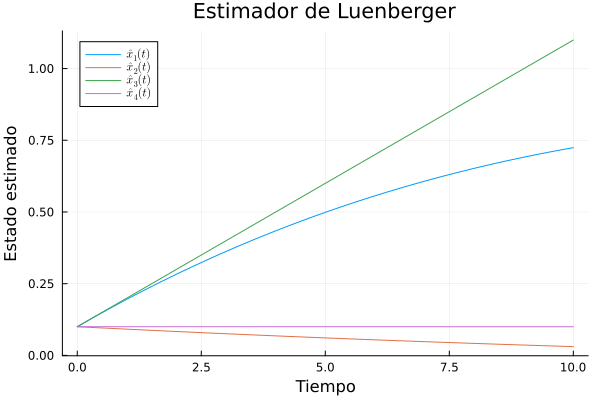

In [95]:
# Graficar las trayectorias estimadas
plot(sol_estimator.t, sol_estimator[1, :], label=L"\hat{x}_1(t)", xlabel="Tiempo", ylabel="Estado estimado")
plot!(sol_estimator.t, sol_estimator[2, :], label=L"\hat{x}_2(t)")
plot!(sol_estimator.t, sol_estimator[3, :], label=L"\hat{x}_3(t)")
plot!(sol_estimator.t, sol_estimator[4, :], label=L"\hat{x}_4(t)")
title!("Estimador de Luenberger")

**Ejercicio 7:** Considere los sistemas lineales controlados y observados del ejercicio 3. A partir de lo aprendido en clases, construya un control estabilizador por feedback lineal a partir de la observación $\vec{Y}$. Simule lo obtenido y compare con las trayectorias del sistema original para distintas condiciones iniciales. Discuta los resultados numéricos obtenidos en base a la teoría vista en cátedra.

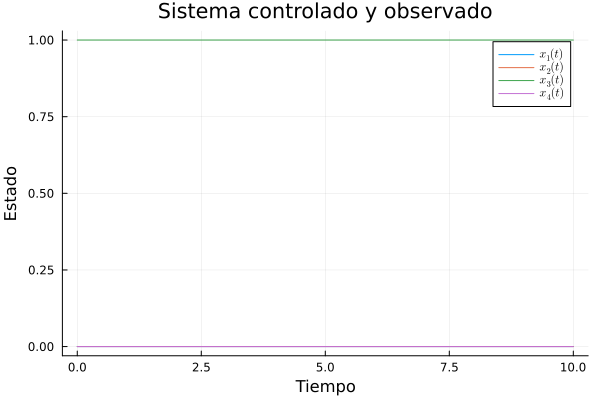

In [96]:
# Definir la dinámica del sistema controlado y observado
function controlled_observed_system!(dX, X, p, t)
    U = -K_lqr * X  # Control basado en el estado
    Y = C * X  # Observación basada en el estado
    dX .= A * X + B * U + L * (Y - C * X)
end

# Condiciones iniciales para el sistema controlado y observado
X0_controlled_observed = [0.0, 0.0, 1.0, 0.0]  # Inicialmente lejos del equilibrio

# Resolver el sistema controlado y observado
tspan_controlled_observed = (0.0, 10.0)
prob_controlled_observed = ODEProblem(controlled_observed_system!, X0_controlled_observed, tspan_controlled_observed)
sol_controlled_observed = solve(prob_controlled_observed, Tsit5(), saveat=0.1)

# Graficar las trayectorias del sistema controlado y observado
plot(sol_controlled_observed.t, sol_controlled_observed[1, :], label=L"x_1(t)", xlabel="Tiempo", ylabel="Estado")
plot!(sol_controlled_observed.t, sol_controlled_observed[2, :], label=L"x_2(t)")
plot!(sol_controlled_observed.t, sol_controlled_observed[3, :], label=L"x_3(t)")
plot!(sol_controlled_observed.t, sol_controlled_observed[4, :], label=L"x_4(t)")
title!("Sistema controlado y observado")

In [72]:
U_comp_cte(x_gorro, x_r,t) = U_cte(t)+K_1*(x_gorro-x_r)
U_comp_sinu(x_gorro, x_r,t) = U_sinu(t)+K_1*(x_gorro-x_r)
U_comp_fb(x_gorro, x_r,t) = U_fb(x_gorro)+K_1*(x_gorro-x_r)
U_comp_BB(x_gorro, x_r,t) = U_BB(t)+K_1*(x_gorro-x_r)

U_comp_BB (generic function with 1 method)

In [73]:
Control_Comp_cte(x_gorro, p, t) = A_1*x_gorro + B_1*U_comp_cte(x_gorro, tray_cte(t),t) + Lt*(C*x_gorro - y_cte(t))
Control_Comp_sinu(x_gorro, p, t) = A_1*x_gorro + B_1*U_comp_sinu(x_gorro, tray_sinu(t),t) + Lt*(C*x_gorro - y_sinu(t))
Control_Comp_fb(x_gorro, p, t) = A_1*x_gorro + B_1*U_comp_fb(x_gorro, tray_fb(t),t) + Lt*(C*x_gorro - y_fb(t))
Control_Comp_BB(x_gorro, p, t) = A_1*x_gorro + B_1*U_comp_BB(x_gorro, tray_BB(t),t) + Lt*(C*x_gorro - y_BB(t))

Control_Comp_BB (generic function with 1 method)

In [74]:
prob_Comp_cte = ODEProblem(Control_Comp_cte, x0, tspan)
prob_Comp_sinu = ODEProblem(Control_Comp_sinu, x0, tspan)
prob_Comp_fb = ODEProblem(Control_Comp_fb, x0, tspan)

# Resolver el sistema controlado y observado 
sol_Comp_cte = solve(prob_Comp_cte)
sol_Comp_sinu = solve(prob_Comp_sinu)
sol_Comp_fb = solve(prob_Comp_fb)

LoadError: UndefVarError: `x0` not defined

**Ejercicio 8:** Utilizando `DifferentialEquations` resuelva numéricamente el sistema no lineal $(1)-(2)$ con los distintos controles obtenidos de los ejercicios 6 y 7. Grafique las soluciones y los controles obtenidos y compare los gráficos con las soluciones del sistema lineal $(3)$.

4×4 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0     1.2288e-8  0.0   0.0
 1.0     0.0        0.0  -5.74087e-12
 0.0     0.0        0.0   0.0
 0.0  2853.92       1.0   0.0